<a href="https://colab.research.google.com/github/Gauranga2022/Fun-with-Python/blob/main/The_Butterfly_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaos and the Logistic map

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initial Observations

The ```Logistic map``` is a polynomial mapping (equivalently, recurrence relation) of degree 2 was popularized in a 1976 paper by the biologist Robert May, in part as a discrete-time demographic model analogous to the logistic equation written down by Pierre François Verhulst. Mathematically, the logistic map is written

$$x_{n+1}=rx_{n}(1-x_{n})$$
$$ 0 \le x0 \le 1$$

where $x_n$ is a number between zero and one, which represents the ratio of existing population to the maximum possible population (will simply refer to it as population) and r is the growth rate. This nonlinear difference equation is intended to capture two effects:

1. Reproduction, where the population will increase at a rate proportional to the current population when the population size is small and
2. Starvation, where the growth rate will decrease at a rate proportional to the value obtained by taking the theoretical "carrying capacity" of the environment less the current population.

The function $pop(n, x_0, r)$ below provides the value of the population after $n$ generations starting from an initial population of $x_0$ and with a growth rate of $r$.

In [2]:
def pop(n, x0, r): #either use a recursive step with memoisation or use an iterative method
  x = x0
  y = r*x*(1-x)
  i = 0
  while i < n:
    x = y
    y = r*x*(1-x)
    i+=1
  return(x)

In [3]:
pop(10, 0.4, 3), pop(11, 0.4, 3), pop(12, 0.4, 3), pop(13, 0.4, 3), pop(25, 0.4, 3)

(0.6169344141830806,
 0.7089790283389793,
 0.6189832971434882,
 0.7075289250025932,
 0.7012319974231519)

How does the plots look like if you plot $n$ vs $x_n$ for different values of $r$ ? Heres a function that takes in a list of initialisations $(x_0)$ and a fixed 'rate' and plots it! Observe that when rate > 3, the plot seems to converge to two (bifurcates) values unlike seeming to coverge to a single value when rate < 3.You cannot use $x = rx(x-1)$ and solve for $x$ (ofcourse in terms of $r$, which is given) because you dont know yet $x_n$ converges. Till then, we use visual tools

In [48]:
def plot(init_list, rate):
  for  j in init_list:
    xlist = np.linspace(1,50,50)
    ylist = []
    for i in xlist:
      ylist.append(pop(i, j, rate))
    plt.plot(xlist, ylist)
    plt.xlabel("n: iteration")
    plt.ylabel("xn: population after iteration n")
    plt.title("xn vs n")

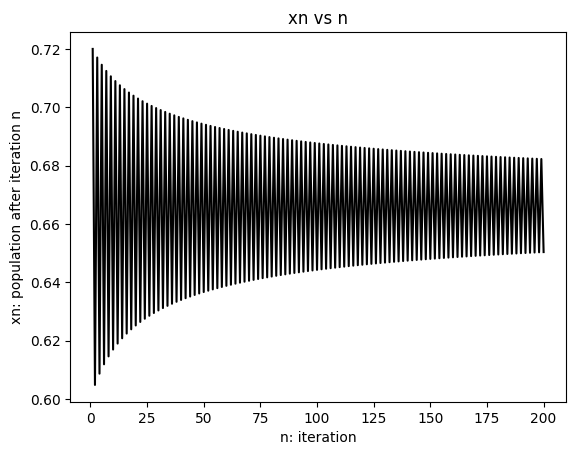

In [38]:
plot([0.4], 3) #2 cycle-periodic

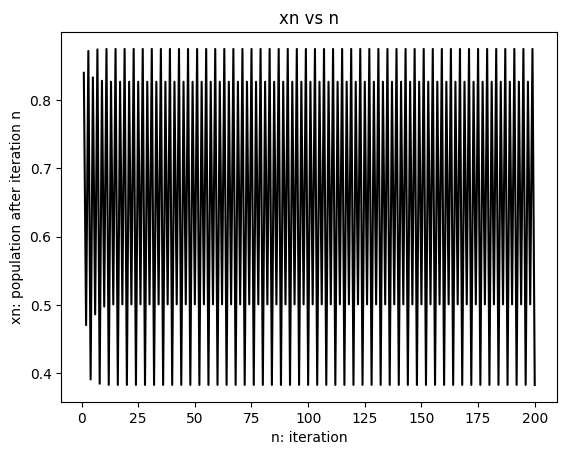

In [39]:
plot([0.4], 3.5) #4 cycle-periodic

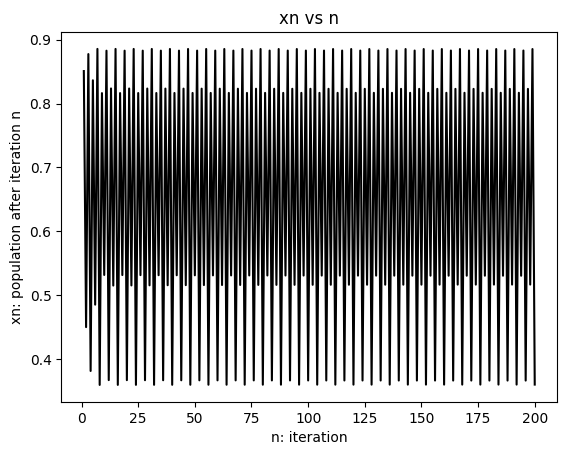

In [40]:
plot([0.4], 3.545) #8 cycle-periodic

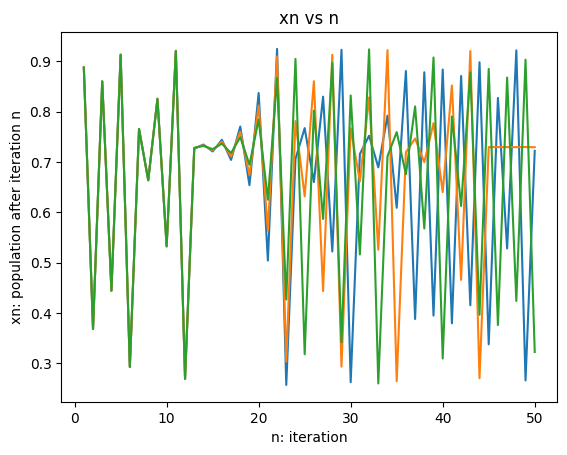

In [56]:
plot([0.40000, 0.40001, 0.40002], 3.7) #chaos. unreliable after around n=15

## Finding no. of cycles

We find out the no of points to which it converges to (converges irrespective of $x_0$ ) for different values of r with accuracy of say $0.0001$

In [42]:
def ncycles(r):
  l = []
  for i in range(10**3):
    l.append(np.round(pop(i, 0.4, r), 5))
  return l

ncycles(3.2)[-2]

0.51304

In [43]:
np.arange(22,100), np.round(2.33452547297452902824738,3)

(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 2.335)

## The bifurcation diagram

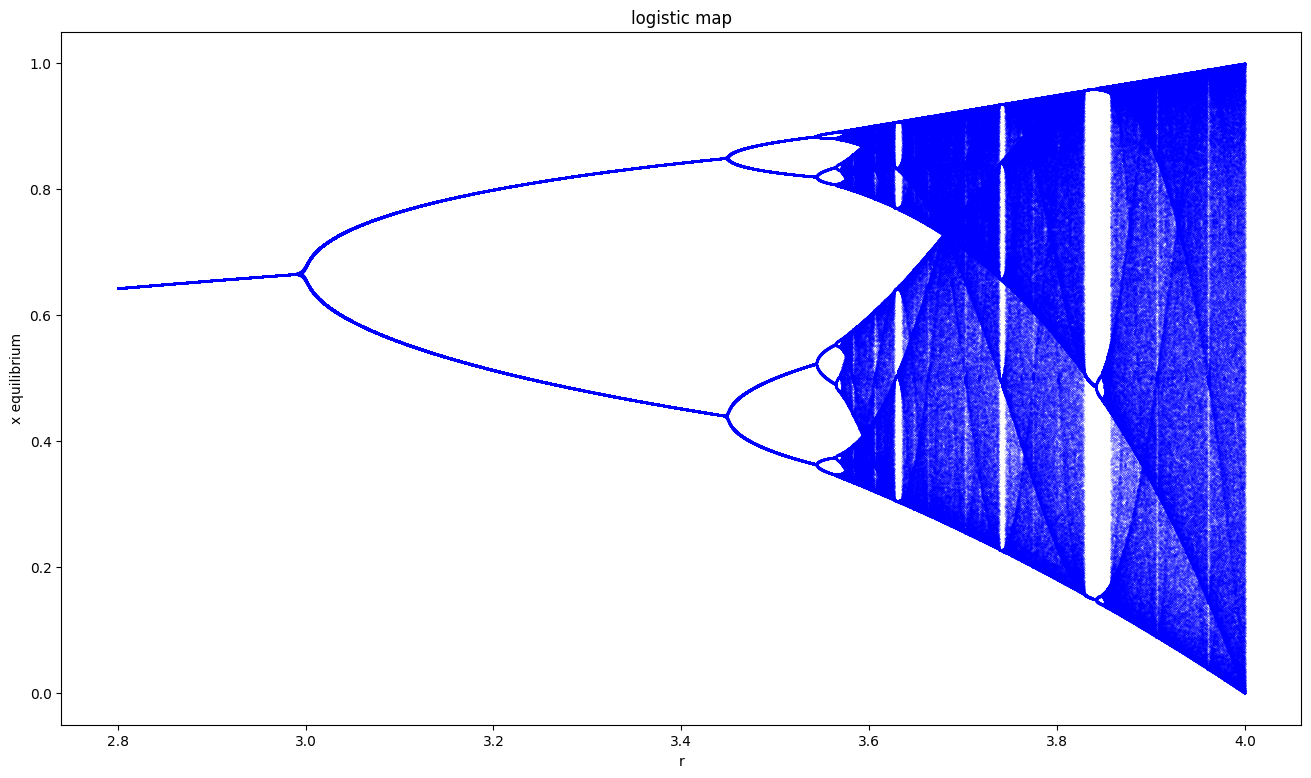

In [44]:
interval = (2.8, 4)  # start, end
accuracy = 0.0001
reps = 600  # number of repetitions
numtoplot = 200
lims = np.zeros(reps)

fig, biax = plt.subplots()
fig.set_size_inches(16, 9)

lims[0] = np.random.rand()
for r in np.arange(interval[0], interval[1], accuracy):
    for i in range(reps - 1):
        lims[i + 1] = r * lims[i] * (1 - lims[i])

    biax.plot([r] * numtoplot, lims[reps - numtoplot :], "b.", markersize=0.2)

biax.set(xlabel="r", ylabel="x equilibrium", title="logistic map")
plt.show()